## Diabetes Health Indicators Dataset

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data



In [53]:
# run this cell only if you haven't installed sqlalchemy and pandas yet
!pip install pandas sqlalchemy

import pandas as pd


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
# using a raw string
df_original = pd.read_csv(r"C:\Users\conor\Desktop\Format Files 251024\VSCodeFiles\diabetes_012_health_indicators_BRFSS2015.csv")
df_original.head() #display the shape of the dataframe

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Now, lets write the DataFrames to a SQLite Database

In [55]:
import sqlite3

# Connect to SQLite (will create if not exists)
conn = sqlite3.connect("diabetes.db")

# Write to SQL tables
df_original.to_sql("diabetes_original", conn, if_exists="replace", index=False)

print("Tables created successfully.")

Tables created successfully.


In [56]:
# Check columns in the table
df_preview = pd.read_sql_query("SELECT * FROM diabetes_original LIMIT 5", conn)
df_preview.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## Query the Data Using SQL

In [57]:
query = """
SELECT Diabetes_012 AS diabetes_status, COUNT(*) AS count
FROM diabetes_original
GROUP BY Diabetes_012
"""

df_query = pd.read_sql_query(query, conn)
df_query

,diabetes_status,count
0,0.0,213703
1,1.0,4631
2,2.0,35346


0 = no diabetes

1 = pre-diabetic

2 = diabetic

Change these using map for readability

In [58]:
df_query['diabetes_status'] = df_query['diabetes_status'].map({
    0: 'No Diabetes',
    1: 'Pre-diabetes',
    2: 'Diabetes'
})
df_query

,diabetes_status,count
0,No Diabetes,213703
1,Pre-diabetes,4631
2,Diabetes,35346


## Pie chart

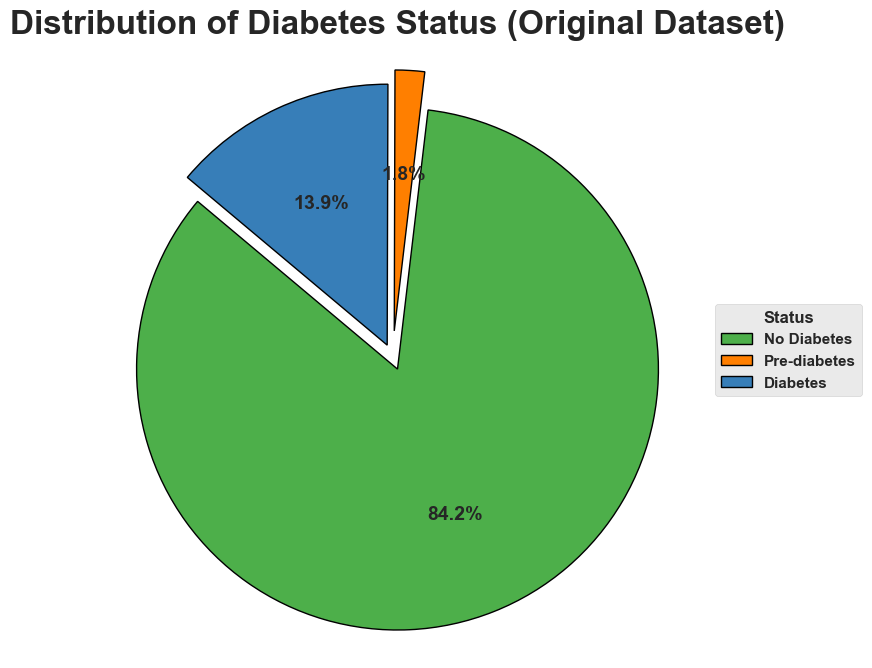

In [59]:
import matplotlib.pyplot as plt

# values and labels
values = df_query['count']
labels = df_query['diabetes_status']
explode = [0.05, 0.1, 0.05] # allowing for a slight separation of the slices
colors = ['#4daf4a', '#ff7f00', '#377eb8'] # green, orange, blue colors for the pie chart
# Set the style for the plot
plt.style.use('ggplot')
# Set the figure size for better visibility
plt.rcParams['figure.figsize'] = [10, 10] # set figure size for better visibility
# Set the font size for the plot
plt.rcParams['font.size'] = 14 # set font size for better readability
# Set the font weight for the plot
plt.rcParams['font.weight'] = 'bold' # set font weight to bold for better emphasis
# Set the color cycle for the plot
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#4daf4a', '#ff7f00', '#377eb8']) # set color cycle for the plot


# create pie chart
plt.figure(figsize=(8, 8))
wedges, _, autotexts = plt.pie(
    values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 14, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

# add title (centered by default with matplotlib)
plt.title("Distribution of Diabetes Status (Original Dataset)", fontsize=24, fontweight='bold', loc="center") # set title with larger font size and bold weight

# add legend for clarity
plt.legend(wedges, labels, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1)) # position the legend outside the pie chart
plt.axis('equal') # equal aspect ratio ensures that pie chart is a circle.
plt.show()

Now, lets explore further using SQL. Perhaps it may be beneficial to replace 0, 1, 2 with no, pre, and diabetes, respectively. 

In [60]:
df_original['diabetes_status'] = df_original['Diabetes_012'].map({
    0: 'No Diabetes',
    1: 'Pre-diabetes',
    2: 'Diabetes'
})

df_original[['Diabetes_012', 'diabetes_status']].head()
# Write the modified DataFrame to a new SQL table
df_original.to_sql("diabetes_modified", conn, if_exists="replace", index=False)
# Check the columns in the modified table
df_modified_preview = pd.read_sql_query("SELECT * FROM diabetes_modified LIMIT 5", conn)
df_modified_preview.columns
# Query to get the count of each diabetes status
query_modified = """
SELECT diabetes_status, COUNT(*) AS count
FROM diabetes_modified
GROUP BY diabetes_status
"""
df_query_modified = pd.read_sql_query(query_modified, conn)
df_query_modified

,diabetes_status,count
0,Diabetes,35346
1,No Diabetes,213703
2,Pre-diabetes,4631


Now we can explore using SQL, having edited the dataset to align with our pie chart.

## BMI

In [61]:
#BMI Analysis
query = """
SELECT diabetes_status, ROUND(AVG(BMI), 1) AS avg_bmi
FROM diabetes_modified
GROUP BY diabetes_status
"""
# Execute the query and store the result in a DataFrame
df_bmi_avg = pd.read_sql_query(query, conn)
df_bmi_avg

,diabetes_status,avg_bmi
0,Diabetes,31.9
1,No Diabetes,27.7
2,Pre-diabetes,30.7


## Physical Activity

In [62]:
#Looking at the percentage of people who are physically active
query = """SELECT diabetes_status, 
       ROUND(AVG(CAST(PhysActivity AS FLOAT)) * 100, 1) AS percent_active
FROM diabetes_modified
GROUP BY diabetes_status
"""
# Query to get the percentage of people who are physically active by diabetes status
df_query_activity = pd.read_sql_query(query, conn)
df_query_activity

,diabetes_status,percent_active
0,Diabetes,63.1
1,No Diabetes,77.9
2,Pre-diabetes,67.8


## Income Status

In [63]:
# Look at income status relative to diabetes status
# Detects socioeconomic patterns in disease prevalence
query = """SELECT Income,
       COUNT(*) AS total_people,
       SUM(CASE WHEN diabetes_status = 'Diabetes' THEN 1 ELSE 0 END) AS diabetes_count,
       ROUND(100.0 * SUM(CASE WHEN diabetes_status = 'Diabetes' THEN 1 ELSE 0 END) / COUNT(*), 1) AS diabetes_rate
FROM diabetes_modified
GROUP BY Income
ORDER BY Income
"""
#execute the query and store the result in a DataFrame
df_income_analysis = pd.read_sql_query(query, conn)
df_income_analysis

,Income,total_people,diabetes_count,diabetes_rate
0,1.0,9811,2383,24.3
1,2.0,11783,3086,26.2
2,3.0,15994,3568,22.3
3,4.0,20135,4054,20.1
4,5.0,25883,4504,17.4
5,6.0,36470,5291,14.5
6,7.0,43219,5265,12.2
7,8.0,90385,7195,8.0


## Smoking & Diabetes

In [64]:
query = """SELECT Smoker,
       COUNT(*) AS total,
       SUM(CASE WHEN diabetes_status = 'Diabetes' THEN 1 ELSE 0 END) AS diabetic,
       ROUND(100.0 * SUM(CASE WHEN diabetes_status = 'Diabetes' THEN 1 ELSE 0 END) / COUNT(*), 1) AS diabetes_rate
FROM diabetes_modified
GROUP BY Smoker
ORDER BY Smoker
"""
# Execute the query and store the result in a DataFrame
df_smoker_analysis = pd.read_sql_query(query, conn)
df_smoker_analysis

# note smoker is a binary variable, smoker/non-smoker

,Smoker,total,diabetic,diabetes_rate
0,0.0,141257,17029,12.1
1,1.0,112423,18317,16.3


Exploring a combination of risk factors that may be most predictive of diabetes:

In [65]:
query = """
SELECT HighBP, HighChol, Smoker,
       COUNT(*) AS total,
       ROUND(100.0 * AVG(CASE WHEN diabetes_status = 'Diabetes' THEN 1 ELSE 0 END), 1) AS diabetes_rate
FROM diabetes_modified
GROUP BY HighBP, HighChol, Smoker
ORDER BY diabetes_rate DESC
LIMIT 20
"""

# Execute the query and store the result in a DataFrame
df_health_conditions = pd.read_sql_query(query, conn)
df_health_conditions

,HighBP,HighChol,Smoker,total,diabetes_rate
0,1.0,1.0,1.0,33971,30.6
1,1.0,1.0,0.0,30689,28.7
2,1.0,0.0,1.0,20308,17.4
3,1.0,0.0,0.0,23861,16.1
4,0.0,1.0,1.0,19396,12.3
5,0.0,1.0,0.0,23535,8.9
6,0.0,0.0,1.0,38748,5.1
7,0.0,0.0,0.0,63172,3.6


Display HighBp and Smoker as a Pivot Table indicating their strong correlation

## Pivot Table

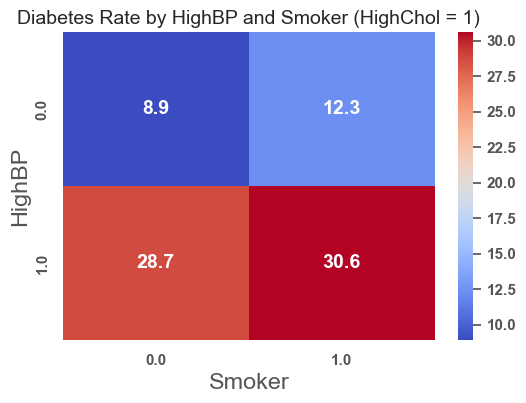

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: filter to just HighChol = 1 if you want to isolate that condition
df_heat = df_health_conditions[df_health_conditions['HighChol'] == 1].copy()

# Pivot table: rows = HighBP, columns = Smoker, values = diabetes_rate
pivot = df_heat.pivot_table(index='HighBP', columns='Smoker', values='diabetes_rate')

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Diabetes Rate by HighBP and Smoker (HighChol = 1)", fontsize=14)
plt.xlabel("Smoker")
plt.ylabel("HighBP")
plt.show()

Perhaps question some instances.

## Does physical activity reduce diabetes risk, even for those with high cholesterol?

In [67]:
query = """
SELECT HighChol, PhysActivity,
       COUNT(*) AS total,
       ROUND(100.0 * AVG(CASE WHEN diabetes_status = 'Diabetes' THEN 1 ELSE 0 END), 1) AS diabetes_rate
FROM diabetes_modified
GROUP BY HighChol, PhysActivity
ORDER BY HighChol DESC, PhysActivity DESC
"""

df_highchol_activity = pd.read_sql_query(query, conn)
df_highchol_activity

,HighChol,PhysActivity,total,diabetes_rate
0,1.0,1.0,77198,19.0
1,1.0,0.0,30393,29.8
2,0.0,1.0,114722,6.7
3,0.0,0.0,31367,12.8


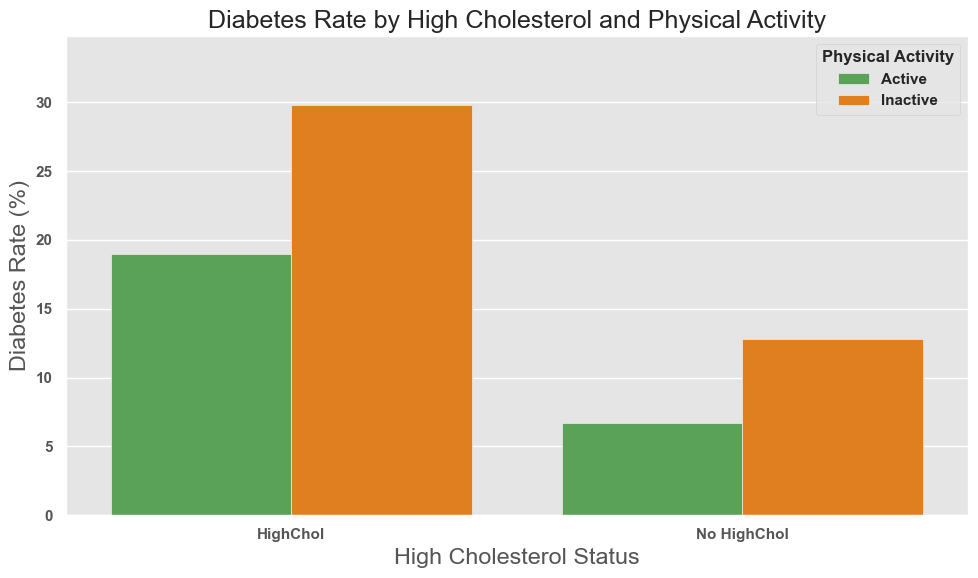

In [68]:
# Map for readability
df_highchol_activity['HighChol_label'] = df_highchol_activity['HighChol'].map({0: 'No HighChol', 1: 'HighChol'})
df_highchol_activity['PhysActivity_label'] = df_highchol_activity['PhysActivity'].map({0: 'Inactive', 1: 'Active'})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_highchol_activity,
    x='HighChol_label',
    y='diabetes_rate',
    hue='PhysActivity_label'
)
plt.title("Diabetes Rate by High Cholesterol and Physical Activity", fontsize=18)
plt.ylabel("Diabetes Rate (%)")
plt.xlabel("High Cholesterol Status")
plt.legend(title="Physical Activity")
plt.ylim(0, df_highchol_activity['diabetes_rate'].max() + 5)
plt.tight_layout()
plt.show()

Answer is a resounding yes, reducing by a comparison of over a third with HighChol, and by a half in those with No HighChol, give or take. 

Another strong risk factor is Heavy Alcohol Consumption, which impairs glucose control and regulation in the body. 

Lets bin the ages in categories (matching the BRFSS (Behavioral Risk Factor Surveillance System) age groups) and compare relative to sex.

In [69]:
# Define bins and labels matching the BRFSS (Behavioral Risk Factor Surveillance System) age groups
bins = [0, 2, 4, 6, 8, 10, 13]  # Grouped by ranges (18–29, 30–39, etc.)
labels = ['18–29', '30–39', '40–49', '50–59', '60–69', '70+']

# create binned age_group column
df_original['age_group'] = pd.cut(df_original['Age'], bins=bins, labels=labels)

In [70]:
#update the diabetes_status column in the original DataFrame
df_original.to_sql("diabetes_modified", conn, if_exists="replace", index=False)

# query to analyze diabetes rates by age, sex, relative to alcohol consumption
query = """
SELECT 
    age_group,
    Sex,
    HvyAlcoholConsump,
    COUNT(*) AS total,
    ROUND(100.0 * AVG(CASE WHEN Diabetes_012 = 2 THEN 1 ELSE 0 END), 1) AS diabetes_rate
FROM diabetes_modified
GROUP BY age_group, Sex, HvyAlcoholConsump
ORDER BY age_group, Sex, HvyAlcoholConsump
"""

df_alcohol_analysis = pd.read_sql_query(query, conn)
df_alcohol_analysis

,age_group,Sex,HvyAlcoholConsump,total,diabetes_rate
0,18–29,0.0,0.0,6242,2.1
1,18–29,0.0,1.0,494,0.6
2,18–29,1.0,0.0,6095,1.3
3,18–29,1.0,1.0,467,0.9
4,30–39,0.0,0.0,13023,4.0
5,30–39,0.0,1.0,764,4.5
6,30–39,1.0,0.0,10424,3.5
7,30–39,1.0,1.0,735,3.1
8,40–49,0.0,0.0,18947,7.6
9,40–49,0.0,1.0,1117,2.6


In [71]:
# somehow the sex and heavy alcohol consumption columns are not being read correctly, so we will re-run the query

query = """
SELECT 
    age_group,
    Sex,
    HvyAlcoholConsump,
    COUNT(*) AS total,
    ROUND(100.0 * AVG(CASE WHEN Diabetes_012 = 2 THEN 1 ELSE 0 END), 1) AS diabetes_rate
FROM diabetes_modified
GROUP BY age_group, Sex, HvyAlcoholConsump
ORDER BY age_group, Sex, HvyAlcoholConsump
"""

df_alcohol_analysis = pd.read_sql_query(query, conn)

In [72]:
# wrk on a clean copy
df_plot = df_alcohol_analysis.copy()

# filter out missing or invalid values
df_plot = df_plot[df_plot['Sex'].isin([0, 1])]
df_plot = df_plot[df_plot['HvyAlcoholConsump'].isin([0, 1])]

# map values
df_plot['Sex'] = df_plot['Sex'].map({0: 'Female', 1: 'Male'})
df_plot['HvyAlcoholConsump'] = df_plot['HvyAlcoholConsump'].map({0: 'No Alcohol', 1: 'Heavy Alcohol'})

print(df_plot[['Sex', 'HvyAlcoholConsump']].drop_duplicates())

      Sex HvyAlcoholConsump
0  Female        No Alcohol
1  Female     Heavy Alcohol
2    Male        No Alcohol
3    Male     Heavy Alcohol


A grouped bar chart may be efficient here. Lets see. 

## Grouped Bar Chart

C:\Users\conor\AppData\Local\Temp\ipykernel_756\4144046622.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


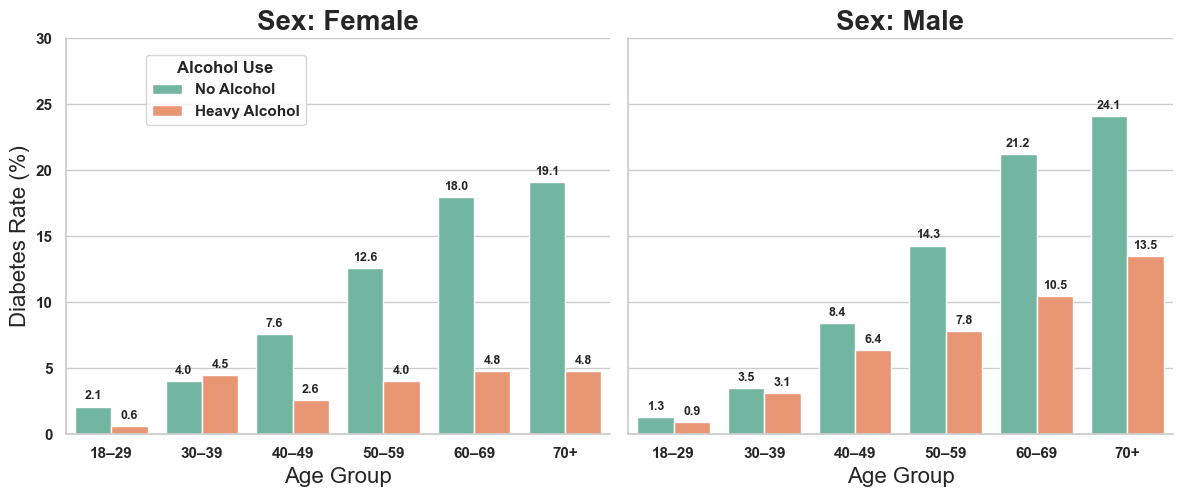

<Figure size 1600x800 with 0 Axes>

In [73]:
sns.set(style="whitegrid") # Set the style for the plot

g = sns.catplot(
    data=df_plot,
    kind='bar',
    x='age_group',
    y='diabetes_rate',
    hue='HvyAlcoholConsump',
    col='Sex',
    ci=None,
    palette='Set2',
    height=5,
    aspect=1.2,
    dodge=True
)

# Set the axis labels and titles
g.set_axis_labels("Age Group", "Diabetes Rate (%)", fontsize=16)
g.set_titles("Sex: {col_name}", size=20, fontweight='bold')
g.set(ylim=(0, 30))


for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', fontsize=9, padding=3)

    
# Customize the legend
g._legend.set_title("Alcohol Use")
g._legend.set_bbox_to_anchor((0.1, 0.9))  # inside top-left
g._legend.set_loc("upper left")           
g._legend.set_frame_on(True)

plt.figure(figsize=(16, 8))
plt.subplots_adjust(left=0.15)
plt.tight_layout()
plt.show()



Clearly both males and females show a strong age-diabetes relationship. However, it is worth noting that, interestingly, those heavy drinkers in the younger age categories showed low diabetes rates, which may align with their overall physical health and activity. Which is counterintuitively represented in the female 30-39 age range. May relate to extremely poor dietary choices / physical activity. 

## GenHlth

Finally, let's delve into the GenHlth category, represented as a scale. 


1 = Excellent

2 = Very Good

3 = Good

4 = Fair

5 = Poor

Note: this is a generalization based on the individual.

In [74]:

query = """
SELECT
    age_group,
    Sex,
    GenHlth,
    COUNT(*) AS count
FROM diabetes_modified
WHERE Diabetes_012 = 2
GROUP BY age_group, Sex, GenHlth
"""
# Execute the query to get the distribution of general health status
df_genhlth_dist = pd.read_sql_query(query, conn)

# Clean the DataFrame: filter out invalid values and map values for readability
df_genhlth_dist = df_genhlth_dist[df_genhlth_dist['Sex'].isin([0, 1])]
df_genhlth_dist['Sex'] = df_genhlth_dist['Sex'].map({0: 'Female', 1: 'Male'})

# Map general health status values to labels
genhlth_labels = {
    1: 'Excellent',
    2: 'Very Good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
}
df_genhlth_dist['GenHlth'] = df_genhlth_dist['GenHlth'].map(genhlth_labels)

# Normalize percentages per age group and sex
df_total = df_genhlth_dist.groupby(['age_group', 'Sex'])['count'].transform('sum')
df_genhlth_dist['percent'] = 100 * df_genhlth_dist['count'] / df_total

Now, lets input those who don't have diabetes, so we can get a grasp of all patients interactions with their doctor / healthcare individual.

In [75]:
query = """
SELECT
    age_group,
    Sex,
    GenHlth,
    COUNT(*) AS count
FROM diabetes_modified
WHERE Diabetes_012 = 0
GROUP BY age_group, Sex, GenHlth
"""
df_genhlth_nondiabetic = pd.read_sql_query(query, conn)


# Clean the DataFrame: filter out invalid values and map values for readability

df_genhlth_nondiabetic = df_genhlth_nondiabetic[df_genhlth_nondiabetic['Sex'].isin([0, 1])]
df_genhlth_nondiabetic['Sex'] = df_genhlth_nondiabetic['Sex'].map({0: 'Female', 1: 'Male'})

genhlth_labels = {
    1: 'Excellent',
    2: 'Very Good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
}
df_genhlth_nondiabetic['GenHlth'] = df_genhlth_nondiabetic['GenHlth'].map(genhlth_labels)

# Normalize to percentage within each age group and sex
df_total = df_genhlth_nondiabetic.groupby(['age_group', 'Sex'])['count'].transform('sum')
df_genhlth_nondiabetic['percent'] = 100 * df_genhlth_nondiabetic['count'] / df_total

## How does each individual, diabetic and non-diabetic, perceive their overall health?

## Bar Plot

C:\Users\conor\AppData\Local\Temp\ipykernel_756\2008485649.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( #  Create a bar plot for self-reported health among non-diabetics


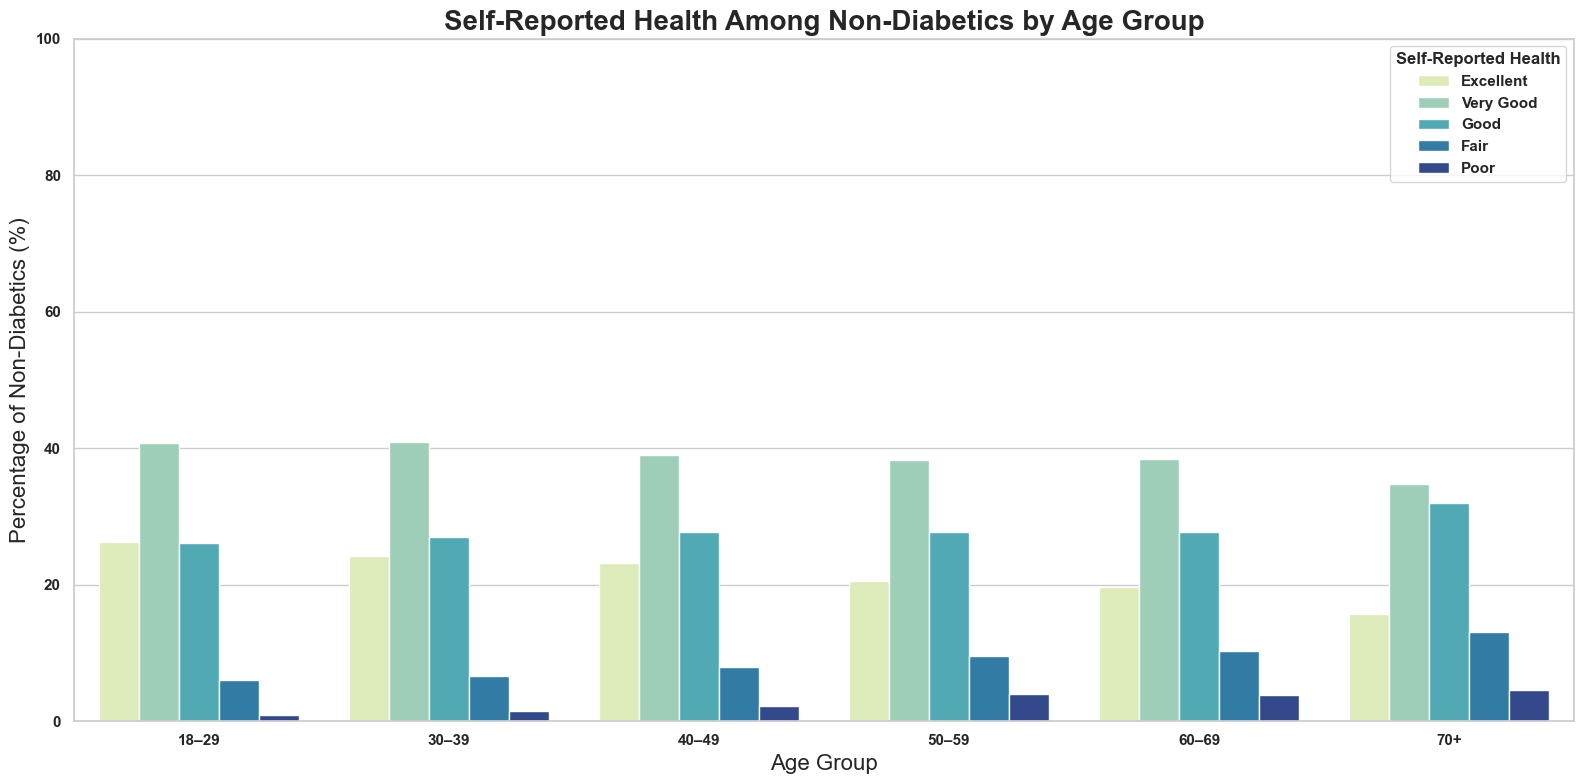

In [76]:

plt.figure(figsize=(16, 8))
sns.barplot( #  Create a bar plot for self-reported health among non-diabetics
    data=df_genhlth_nondiabetic,
    x='age_group',
    y='percent',
    hue='GenHlth',
    ci=None,
    palette='YlGnBu',
    dodge=True
)

plt.title("Self-Reported Health Among Non-Diabetics by Age Group", fontsize=20, fontweight='bold')
plt.xlabel("Age Group", fontsize=16)
plt.ylabel("Percentage of Non-Diabetics (%)", fontsize=16)
plt.legend(title="Self-Reported Health")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

C:\Users\conor\AppData\Local\Temp\ipykernel_756\2238165894.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( # Plotting the distribution of self-reported health among diabetics


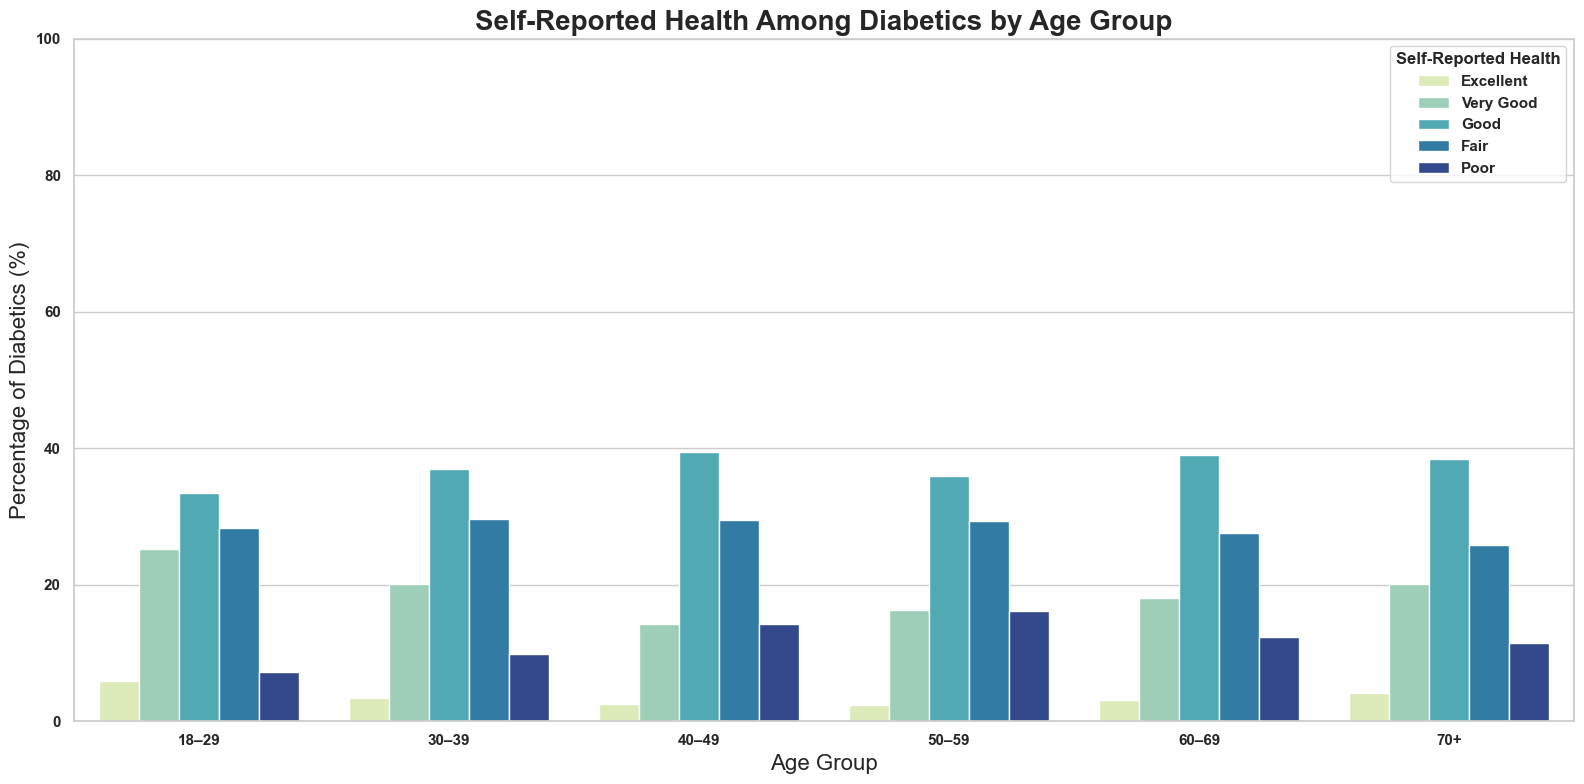

In [77]:
plt.figure(figsize=(16, 8))
sns.barplot( # Plotting the distribution of self-reported health among diabetics
    data=df_genhlth_dist,
    x='age_group',
    y='percent',
    hue='GenHlth',
    ci=None,
    palette='YlGnBu',
    dodge=True
)

plt.title("Self-Reported Health Among Diabetics by Age Group", fontsize=20, fontweight='bold')
plt.xlabel("Age Group", fontsize=16)
plt.ylabel("Percentage of Diabetics (%)", fontsize=16)
plt.legend(title="Self-Reported Health")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Interestingly, those that perceived their general health to be "Good" resulted in the highest percentage in the category. Perhaps it could be boiled down to a generalization of how unhealthy patients perceive their health to be. While it is clear from the two charts that those with diabetes perceive their health to be overall worse than people without - even at the same age - indicated by the skewed nature of the graphs (non - skewed right (positively), true - skewed left (negatively)). 

Contrasting the two extremes - "Excellent" and "Poor" - no surprise to see the level of difference in diabetics / non-diabetics for each age group, in some cases having over 5 times the difference, respectively.